In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data into a df and display first 5 rows
data = pd.read_csv("credit_scoring.csv")
data.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan


In [3]:
# Column insights
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Education Level            1000 non-null   object 
 4   Employment Status          1000 non-null   object 
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   float64
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [4]:
# Descriptive statistics
data.describe()

,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,42.702000,0.509950,1452.814000,5.580000,2.471401e+06,10.686600,37.128000
std,13.266771,0.291057,827.934146,2.933634,1.387047e+06,5.479058,17.436274
min,20.000000,0.000000,0.000000,1.000000,1.080000e+05,1.010000,12.000000
25%,31.000000,0.250000,763.750000,3.000000,1.298000e+06,6.022500,24.000000
50%,42.000000,0.530000,1428.000000,6.000000,2.437500e+06,10.705000,36.000000
75%,54.000000,0.750000,2142.000000,8.000000,3.653250e+06,15.440000,48.000000
max,65.000000,1.000000,2857.000000,10.000000,4.996000e+06,19.990000,60.000000


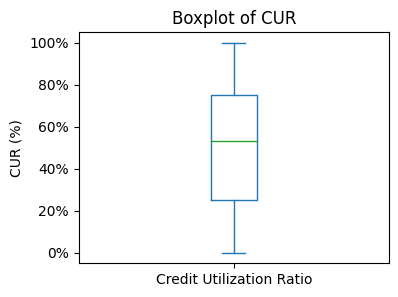

In [5]:
# Distribution of credit utilization ratio
plt.figure(figsize=(4,3))
data['Credit Utilization Ratio'].plot(kind='box', title='Boxplot of CUR')
plt.gca().set_yticklabels([f'{x*100:.0f}%' for x in plt.gca().get_yticks()])
plt.ylabel('CUR (%)')
plt.show()

In [6]:
data[['Loan Amount']].describe()

,Loan Amount
count,1.000000e+03
mean,2.471401e+06
std,1.387047e+06
min,1.080000e+05
25%,1.298000e+06
50%,2.437500e+06
75%,3.653250e+06
max,4.996000e+06


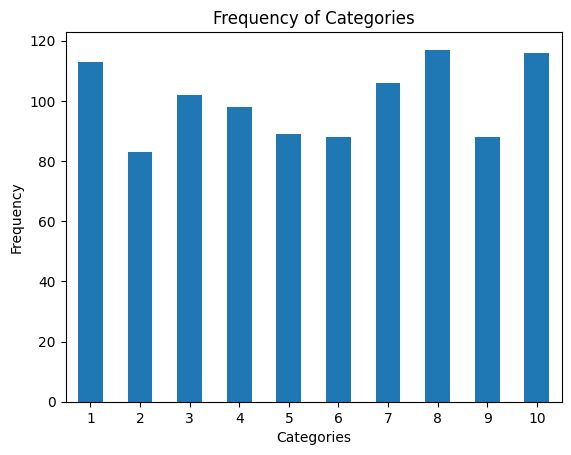

In [7]:
# Distribution of number of credit accounts
no_of_acc_counts = data['Number of Credit Accounts'].value_counts().sort_index()
no_of_acc_counts.plot(kind='bar')
plt.title('Frequency of Categories')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

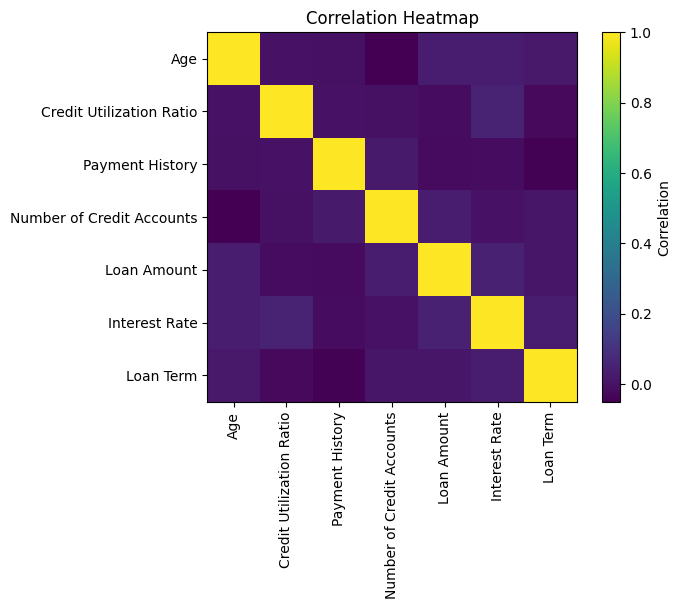

In [8]:
# Correlation heatmap
corr_mtrx = data.corr()
plt.imshow(corr_mtrx, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Correlation Heatmap')
plt.xticks(ticks=np.arange(len(corr_mtrx.columns)), labels=corr_mtrx.columns, rotation=90)
plt.yticks(ticks=np.arange(len(corr_mtrx.index)), labels=corr_mtrx.index)
plt.show()

In [9]:
 data['Employment Status'].unique()

array(['Employed', 'Unemployed', 'Self-Employed'], dtype=object)

In [10]:
 data['Education Level'].unique()

array(['Master', 'High School', 'PhD', 'Bachelor'], dtype=object)

In [11]:
# Calculate credit scores using the complete FICO formula

# Define the mapping for categorical features
education_level_mapping = {'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}
employment_status_mapping = {'Unemployed': 0, 'Employed': 1, 'Self-Employed': 2}

# Apply mapping to categorical features
data['Educ_level'] = data['Education Level'].map(education_level_mapping)
data['Empl_status'] = data['Employment Status'].map(employment_status_mapping)

# Calculate credit scores using the complete FICO formula
credit_scores = []

for index, row in data.iterrows():
    payment_history = row['Payment History']
    credit_utilization_ratio = row['Credit Utilization Ratio']
    number_of_credit_accounts = row['Number of Credit Accounts']
    education_level = row['Educ_level']
    employment_status = row['Empl_status']

    # Apply the FICO formula to calculate the credit score
    credit_score = (payment_history * 0.35) + \
                   (credit_utilization_ratio * 0.30) + \
                   (number_of_credit_accounts * 0.15) + \
                   (education_level * 0.10) + \
                   (employment_status * 0.10)

    # Round the credit score to the nearest whole number
    credit_score = round(credit_score)

    credit_scores.append(credit_score)

# Add the credit scores as a new column to the DataFrame
data['Credit Score'] = credit_scores

data.head()
# data[['Educ_level', 'Credit Score']].sort_values(by='Educ_level',ascending=False)

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,Educ_level,Empl_status,Credit Score
0,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan,3,1,941
1,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan,1,0,831
2,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan,3,1,971
3,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan,4,0,481
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan,2,2,291


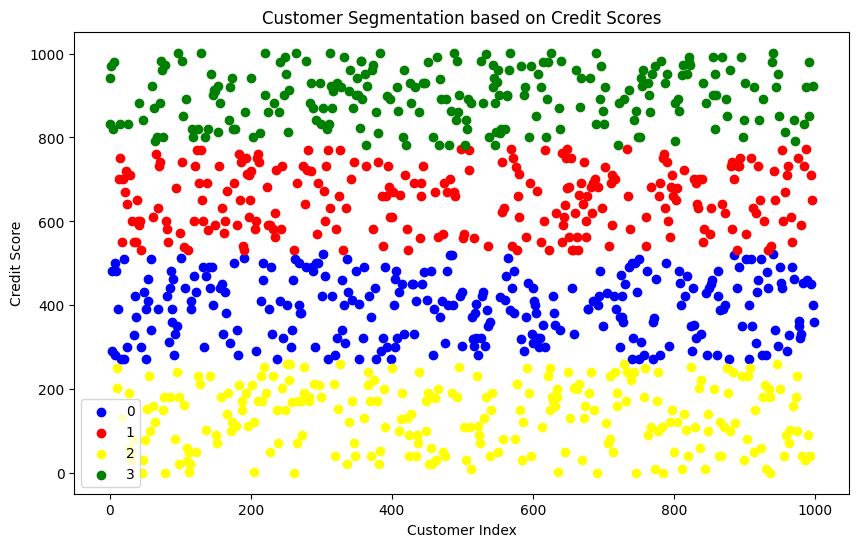

In [12]:
# Segmentation Based on Credit Scores
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
data['Segment'] = kmeans.fit_predict(data[['Credit Score']])
data = data.sort_values('Segment')

# Scatter plot
plt.figure(figsize=(10, 6))
for segment, color in zip(data['Segment'].unique(), ['blue', 'red', 'yellow', 'green']):
    plt.scatter(data[data['Segment'] == segment].index,
                data[data['Segment'] == segment]['Credit Score'],
                c=color, label=segment)

plt.xlabel('Customer Index')
plt.ylabel('Credit Score')
plt.title('Customer Segmentation based on Credit Scores')
plt.legend()
plt.show()

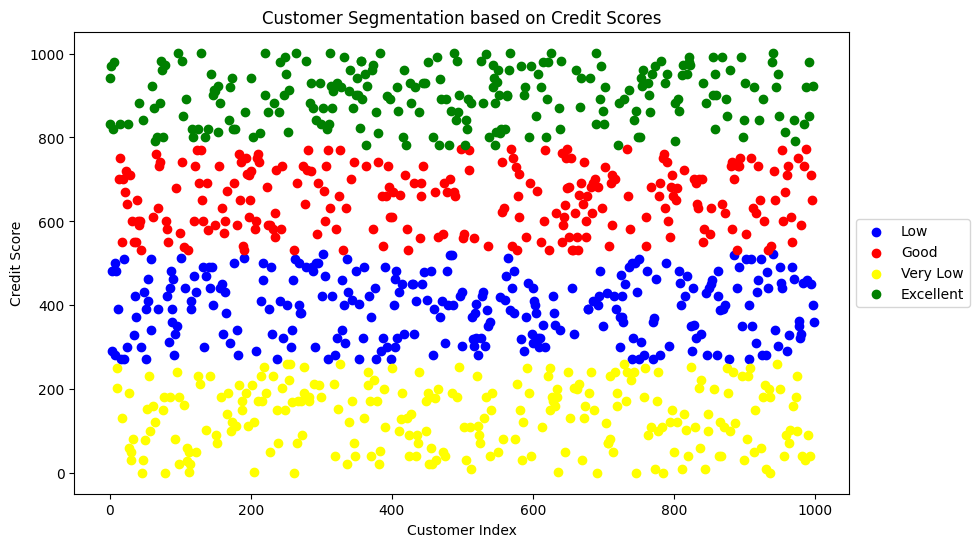

In [13]:
# Give segments meaningful names

data['Segment'] = data['Segment'].map({2: 'Very Low',
                                       0: 'Low',
                                       1: 'Good',
                                       3: "Excellent"})

# Convert the 'Segment' column to category data type
data['Segment'] = data['Segment'].astype('category')

# Scatter plot
plt.figure(figsize=(10, 6))
for segment, color in zip(data['Segment'].unique(), ['blue', 'red', 'yellow', 'green']):
    plt.scatter(data[data['Segment'] == segment].index,
                data[data['Segment'] == segment]['Credit Score'],
                c=color, label=segment)

plt.xlabel('Customer Index')
plt.ylabel('Credit Score')
plt.title('Customer Segmentation based on Credit Scores')

# Move legend outside the plot area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()